In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize
import nltk
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv

pd.options.display.max_columns = 30
#%matplotlib inline
#nltk.download('punkt')

In [2]:
filepath = 'Telemachus.txt'
text = ''
with open(filepath, 'r') as f:
  text = f.read()
text = text.replace('â€', '')

#nltk.data.load('tokenizers/punkt/english.pickle')
tokenized_text = tokenize.sent_tokenize(text)

In [3]:
nlp = spacy.load("en_core_web_sm")
def lemmatize(text):
    doc = nlp(text)
    # Turn it into tokens, ignoring the punctuation
    tokens = [token for token in doc if not token.is_punct]
    # Convert those tokens into lemmas, EXCEPT the pronouns, we'll keep those.
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

In [4]:
vectorizer = TfidfVectorizer(max_features=100, tokenizer=lemmatize, stop_words='english')
matrix = vectorizer.fit_transform(tokenized_text)

c:\Users\koiv\Workspace\Personal\James Joyce\Ulysses-Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\koiv\Workspace\Personal\James Joyce\Ulysses-Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


In [5]:
vectorizer.get_feature_names_out()

array(['\n', '\n\n', ' ', "'s", 'air', 'answer', 'arm', 'art', 'ask',
       'bay', 'begin', 'bend', 'black', 'body', 'bowl', 'bring', 'buck',
       'come', 'damn', 'day', 'dedalus', 'door', 'doorway', 'drink',
       'eye', 'face', 'father', 'feel', 'follow', 'forward', 'gaze',
       'god', 'good', 'green', 'grey', 'haine', 'hair', 'hand', 'head',
       'hear', 'hold', 'irish', 'key', 'kinch', 'know', 'laugh', 'lay',
       'let', 'light', 'like', 'long', 'look', 'make', 'malachi', 'man',
       'mean', 'milk', 'mirror', 'money', 'morning', 'mother', 'mulligan',
       'o', 'old', 'open', 'parapet', 'pocket', 'pour', 'rise', 'round',
       'say', 'sea', 'servant', 'shirt', 'sir', 'sit', 'smile', 'speak',
       'stand', 'stephen', 'sweet', 'table', 'tea', 'tell', 'think',
       'time', 'tower', 'trouser', 'turn', 'voice', 'wait', 'walk',
       'want', 'water', 'white', 'wind', 'woman', 'word', 'yes', 'young'],
      dtype=object)

In [6]:
feature_names = vectorizer.get_feature_names_out()
dense = matrix.toarray()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
sum = df.T.sum(axis=1)
dict = sum.to_dict()
#dict

In [7]:
del dict[list(dict.keys())[0]]
del dict[list(dict.keys())[0]]
del dict[list(dict.keys())[0]]
del dict[list(dict.keys())[0]]
dict

{'air': 3.575608928244571,
 'answer': 8.175355484121544,
 'arm': 3.9837231474182326,
 'art': 4.194969529564742,
 'ask': 16.606053179892875,
 'bay': 3.9092992556766086,
 'begin': 4.242225638165581,
 'bend': 3.8124600733436353,
 'black': 3.884458767577961,
 'body': 3.200830037829034,
 'bowl': 3.3889479461009766,
 'bring': 4.7958440179972985,
 'buck': 35.04222301723527,
 'come': 19.072491371265222,
 'damn': 3.249317796144563,
 'day': 7.094578778989282,
 'dedalus': 6.051786609664299,
 'door': 3.3698403111934327,
 'doorway': 4.077491135412645,
 'drink': 3.5965910367236678,
 'eye': 8.419108109715935,
 'face': 9.586336684554889,
 'father': 5.543292726916485,
 'feel': 4.744254680915617,
 'follow': 3.724048484754351,
 'forward': 3.200321545456401,
 'gaze': 4.656300385110839,
 'god': 13.463352606612812,
 'good': 4.486578073939448,
 'green': 3.732730154433706,
 'grey': 4.059190339370389,
 'haine': 24.078997435725647,
 'hair': 2.9792700606208324,
 'hand': 9.411893322092379,
 'head': 4.462968616610

In [8]:
sortedDict = sorted(dict.items(), key=lambda x:x[1], reverse=True)
sortedDict
with open('telemachia_terms_unclean.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['Term','Frequency'])
    for row in sortedDict:
        csv_out.writerow(row)

In [9]:
del dict['say']
del dict['ask']
del dict['answer']


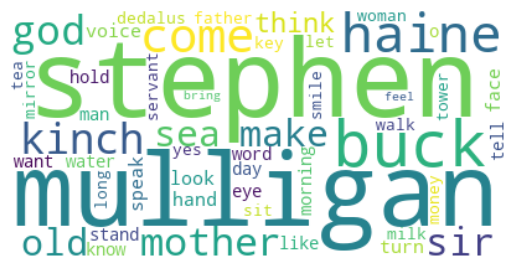

In [10]:
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(dict)

plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig("telemachia_wordart_no_clean.pdf")
plt.show()


In [11]:
del dict['mulligan']
del dict['stephen']
del dict['buck']
del dict['haine']
del dict['kinch']
del dict['come']

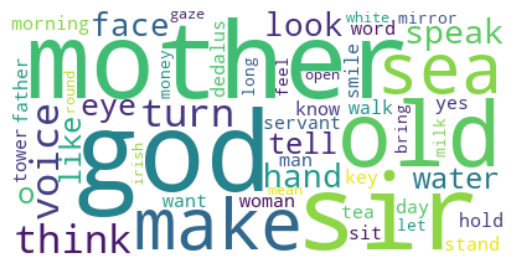

In [12]:
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(dict)

plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig("telemachia_wordart_clean.pdf")
plt.show()

In [13]:
sortedDict = sorted(dict.items(), key=lambda x:x[1], reverse=True)
with open('telemachia_terms_cleaned.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['Term','Frequency'])
    for row in sortedDict:
        csv_out.writerow(row)